# Positie voertuig uit snelheid berekenen

### Inleiding
Gegeven de snelheden van voertuigen op verschillende momenten in de tijd kunnen
de posities van deze voertuigen worden berekend.  
Dit soort simulaties worden vaak uitgevoerd om de doorstroming op verkeersknooppunten te kunnen berekenen.  
In deze opdracht gaan we uit van twee rechte stukken weg die loodrecht op elkaar kruisen in de oorsprong
en dat de voertuigen 2 meter lang zijn en 1,5 meter breed.  
Voor elke auto wordt per deciseconde opgeslagen hoe hard de auto rijdt.
Deze data wordt opgeslagen in een csv bestand.  
Voor deze opdracht moet voor elke voertuig worden berekend of en wanneer een botsing plaatsvind.
Hierbij moet het tijdstip van de eerste botsing en de voertuigen worden teruggegeven.  
Verder moet er een grafiek van de posities van de voertuigen over de gegeven tijdsperiode worden gemaakt.

### Aanpak
Om van snelheid en tijd naar afgelegde afstand te komen komt de volgende formule als eerst naar boven:  
$s = v \cdot t$  
Aangezien deze op zichzelf hier niet te gebruiken valt moet hij aangepast worden.
Allereerst hebben we steeds te maken met twee snelheden en de tijdsinterval ertussen.
Hierdoor is het handiger om van deze twee snelheden steeds het gemiddelde te berekenen.
De formule wordt dan al als volgt:  
$s = v_{gem} \cdot t$  
Om uiteindelijk de gemiddelde snelheid te berekenen kan de volgende formule worden toegepast:  
$v_{gem} = \frac{v_{eind} - v_{begin}}{2} + v_{begin}$  


### Uitwerking
Aangezien er in de data meerdere auto's worden bijgehouden is er gekozen om voor een auto een klasse te maken.
Hierdoor kan er voor elke auto zijn eigen object worden aangemaakt, wat als voordeel heeft dat er per
auto gemakkelijk data kan worden opgeslagen.


In [1]:
import csv
import matplotlib.pyplot as plt

class Vehicle:
    """
    This class represents a vehicle
    """
    def __init__(self, col_num):
        self.current_position = 0.0
        self.begin_position = 0.0
        self.distance_traveled = 0.0
        self.direction = ""
        self.col_id = int(col_num)
        self.last_velocity = 0.0
        self.distance_list = []
    
    def get_current_position(self):
        """Returns the current position of the vehicle"""
        return self.current_position
    
    def set_direction(self, direction):
        """Sets the direction"""
        self.direction = direction
    
    def get_direction(self):
        """Returns the direction"""
        return self.direction
    
    def set_begin_position(self, bg_pos):
        """Sets the begin position"""
        self.begin_position = float(bg_pos)
        
    def set_last_velocity(self, last_velo):
        """Sets the last velocity"""
        self.last_velocity = float(last_velo)
    
    def set_distance_list(self, new_velo):
        """Calculates the distance with 2 velocities and adds it to the list"""
        # calculate the mean velocity and from there the distance traveled
        mean_velocity = (((new_velo - self.last_velocity) / 2) + self.last_velocity)
        new_distance = mean_velocity * 0.1
        
        # update the car's position
        self.distance_traveled += new_distance
        self.current_position = self.begin_position + self.distance_traveled
        
        # add the new position to the list and update the last velocity
        self.distance_list.append(self.current_position)
        self.last_velocity = new_velo
    
    def get_distance_list(self):
        """Returns the a list with all the positions of said vehicle"""
        return self.distance_list
    

Nu de klasse gebouwd is, kunnen van de klasse objecten gemaakt worden.
Bij de constructie van een object wordt de kolom id meegegeven.
Deze waarde zorgt ervoor dat de auto's individueel herkenbaar zijn.  
In het eerste csv bestand staan de id's van de auto's met hun richting.
Tijdens de iteratie over de eerste rij worden de objecten geïnstantieerd met de id's van de auto's.
Bij de tweede rij wordt bij elke auto zijn rijrichting opgeslagen. 


In [2]:
file_name1 = "verkeerssimulatie-richting.csv"

with open(file_name1, 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    
    # instantiate the list where the vehicles are stored
    vehicle_list = []
    is_first_row = True
    
    # iterate over every row in the csv file
    for row in csv_reader:
        if is_first_row:
            # first row
            for car in row:
                # instantiate a new vehicle and add to the list
                vehicle_list.append(Vehicle(car))
            is_first_row = False
        else:
            # second row
            for car in vehicle_list:
                # set the travel direction for a vehicle
                car.set_direction(row[car.col_id + - 1])

# printing car with its direction
for car in vehicle_list:
    print("Car {0}; direction: {1}".format(car.col_id, car.get_direction()))


Car 1; direction: h
Car 2; direction: v
Car 3; direction: v


Om te berekenen of twee voertuigen zouden botsen moet elk voertuig met alle andere voertuigen worden vergeleken.
Aangezien deze check vaker uitgevoerd moet worden is hiervoor een functie aangemaakt.  
Allereerst wordt over de lijst die mee wordt gegeven als parameter geïtereerd.
Hierna wordt nog een keer geïtereerd over de lijst waarbij de voertuigen geselecteerd worden die niet zichzelf zijn.  
Als twee voertuigen in dezelfde richting bewegen wordt gekeken of de onderlinge afstand minder dan 2 meter is.
Wanneer dit zo is, is er namelijk sprake van een botsing aangezien de auto's 2 meter lang zijn en er vanuit gegaan kan worden
dat de metingen vanaf het middelpunt van de auto gedaan worden.  
Wanneer de twee voertuigen elkaar loodrecht kruisen zal berekend worden hoe ver de twee auto's zich vanaf het kruispunt
bevinden. Als beide auto's zich binnen 1,75 meter van het kruispunt bevinden botsen ze. 


In [3]:
def check_for_collision(vehicle_list):
    """Checks for collisions between vehicles in the vehicle list that is given as parameter"""
    
    for car in vehicle_list:
        
        for car2 in vehicle_list:
            
            if car.col_id != car2.col_id:
                # the car is not itself
                if car.get_direction() == car2.get_direction():
                    # the cars are heading in the same direction
                    if abs(car.get_current_position() - car2.get_current_position()) <= 2:
                        # collision
                        print("car {0} and car {1} collided".format(car.col_id, car2.col_id))
                        return True
                    else:
                        # no collision
                        return False
                else:
                    # the cars will cross
                    if (-1.75 <= car.get_current_position() <= 1.75) and (-1.75 <= car2.get_current_position() <= 1.75):
                        # collision
                        print("Car {0} and car {1} collided".format(car.col_id, car2.col_id))
                        return True
                    else:
                        # no collision
                        return False
    

In het csv bestand die onder de naam $file\_name2$ opgeslagen geeft de eerste rij de begin positie aan van het voertuig.
Vanaf de volgende rijen worden de snelheid van de voertuigen opgeslagen.  
Tijdens de iteratie over alle rijen van het bestand wordt in de eerste rij voor elke auto zijn beginpositie opgeslagen.
Hierna wordt voor de tweede rij voor elke auto de eerste snelheid opgeslagen.
Voor de rest van de rijen wordt bij elke volgende rij voor elke auto zijn afgelegde afstand berekend.  
Wanneer dit berekend is worden alle gegevens van elke auto geupdate.
Ook wordt hierna, zolang er nog geen botsing plaats heeft gevonden, gecheckt of er een botsing plaatsvind.
Wanneer dit zo is zal de tijd worden uitgeprint van de botsing met de informatie hierover.


In [4]:
file_name2 = "verkeerssimulatie-rechteweg-snelheden.csv"

with open(file_name2, 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    
    # instantiate a time count and a boolean which tells if two cars have already collided
    time_count = 0
    has_not_collided = True
    
    # iterate over every row
    for row in csv_reader:
        
        # first row in csv file
        if time_count == 0:
            # iterate over every car in the vehicle list
            for car in vehicle_list:
                # retrieve the current_position of every car
                car.set_begin_position(row[car.col_id])
                
            # increment count
            time_count += 1
        
        # second row in csv file
        elif time_count == 1:
            # iterate over every car in the vehicle list
            for car in vehicle_list:
                car.set_last_velocity(row[car.col_id])
            # increment count
            time_count += 1
        
        # all the other rows in the csv file
        else:
            # iterate over every car in the vehicle list
            for car in vehicle_list:
                
                # 
                velocity = float(row[car.col_id])
                car.set_distance_list(velocity)
                
            # if there hasn't been a collision yet check for collision
            if has_not_collided:
                if check_for_collision(vehicle_list):
                    # if there is a collision print the time and turn has_not_collided to False
                    has_not_collided = False
                    print("Time collision: {0} seconds\n".format(row[0]))
            
            # increment count
            time_count += 1

# 
for car in vehicle_list:
    print("Car: {0}\n"
          "Direction: {1}\n"
          "Begin position: {2}m\n"
          "Traversed distance: {3}\n"
          "End position: {4}m\n".format(car.col_id, car.get_direction(),
                                        car.begin_position, car.distance_traveled,
                                        car.get_current_position()))


Car: 1
Direction: h
Begin position: 0.0m
Traversed distance: 457.19999999999726
End position: 457.19999999999726m

Car: 2
Direction: v
Begin position: -6.0m
Traversed distance: 120.00000000000001
End position: 114.00000000000001m

Car: 3
Direction: v
Begin position: -3.0m
Traversed distance: 900.0000000479893
End position: 897.0000000479893m



Wanneer het gehele csv bestand is doorlopen zijn alle afgelegde afstanden van een auto object opgeslagen in een lijst.
Deze afstanden zullen nu in een grafiek geplot moeten worden.  
Allereerst wordt er gezocht naar het bereik en de limiet van de x en y assen.
Hierna wordt er per auto object de lijst met afstanden opgevraagd en geplot.  
Om wat meer overzicht te creeëren is in de eerste grafiek de afgelegde afstand over de eerste 20 seconden geplot.
In de tweede grafiek wordt de afgelegde afstand over de totale tijd geplot.


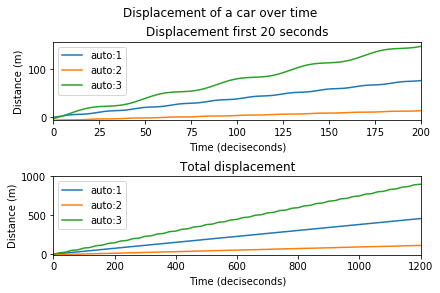

In [5]:
# variables for calculating the min and max range
min_y = 100.0
max_distance = 0.0

# variables for calculating the min and max domain for first 20 seconds
max_short_distance = 0.0
short_time = 200

# calculating the min and max range and the domain
for car in vehicle_list:
    if car.distance_traveled > max_distance:
        max_distance = car.distance_traveled
    if car.begin_position < min_y:
        min_y = car.begin_position
    if car.get_distance_list()[200] > max_short_distance:
        max_short_distance = car.get_distance_list()[200]
        

# plotting the figure
fig, axs = plt.subplots(2, 1, constrained_layout=True)
# add a title
fig.suptitle('Displacement of a car over time')

# the first subplot setup (first 20 seconds)
axs[0].set_title("Displacement first 20 seconds")
axs[0].set_xlabel("Time (deciseconds)")
axs[0].set_ylabel("Distance (m)")
axs[0].set_xlim(0, short_time)
axs[0].set_ylim(min_y, int(max_short_distance) + 10)

# the second subplot setup (overall)
axs[1].set_title("Total displacement")
axs[1].set_xlabel("Time (deciseconds)")
axs[1].set_ylabel("Distance (m)")
axs[1].set_xlim(0, time_count)
axs[1].set_ylim(min_y, int(max_distance) + 100)

# plotting the distances
for x in range(0, len(axs)):
    for car in vehicle_list:
        axs[x].plot(car.get_distance_list(), label='auto:{0}'.format(car.col_id))
    # adding the legend
    axs[x].legend(loc='upper left')
